In [16]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [17]:
x,y = make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)

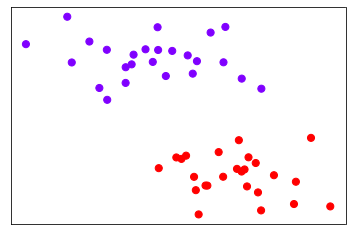

In [18]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='rainbow')
plt.xticks([])
plt.yticks([])
plt.show()

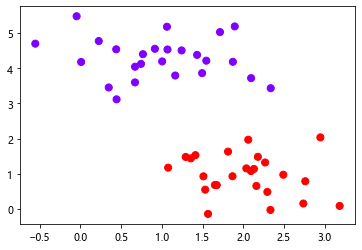

In [60]:
# 创建散点图
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='rainbow')
ax = plt.gca()      # 获取当前子图  不存在则创建新子图
#  获取坐标轴最大值和最小值
xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [61]:
# 在最大值和最小值之间 形成30哥规律数据
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)

In [62]:
# 将两个一维向量转化为特征举证
# 将两个特征举证广播，以便获取y shape和x shape
axisy,axisx = np.meshgrid(axisy,axisx)

In [63]:
# 将多个结构一致得一维数组按行进行堆叠起来
# xy是已经形成得网络
xy = np.vstack([axisx.ravel(),axisy.ravel()]).T

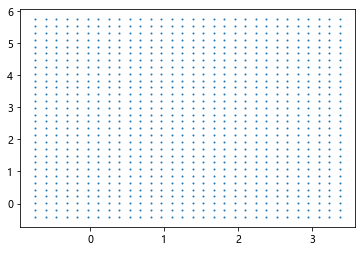

In [64]:
plt.scatter(xy[:,0],xy[:,1],s=1,cmap='rainbow')

In [65]:
# 举个栗子
a = np.array([1,2,3])
b = np.array([7,8])

In [66]:
v1,v2 = np.meshgrid(a,b)

In [67]:
v1

array([[1, 2, 3],
       [1, 2, 3]])

In [68]:
v2

array([[7, 7, 7],
       [8, 8, 8]])

In [69]:
np.vstack([v1.ravel(),v2.ravel()]).T
# 实质是  两个数组元素得亮亮组合

array([[1, 7],
       [2, 7],
       [3, 7],
       [1, 8],
       [2, 8],
       [3, 8]])

In [70]:
# 建模  计算决策边界
clf = SVC(kernel='linear').fit(x,y)
# decision_function 返回，每个样本所对应 到 决策边界得距离
z = clf.decision_function(xy).reshape(axisx.shape)

In [71]:
z

array([[ 3.59599448,  3.30273116,  3.00946785,  2.71620453,  2.42294121,
         2.12967789,  1.83641457,  1.54315125,  1.24988793,  0.95662461,
         0.66336129,  0.37009797,  0.07683465, -0.21642866, -0.50969198,
        -0.8029553 , -1.09621862, -1.38948194, -1.68274526, -1.97600858,
        -2.2692719 , -2.56253522, -2.85579854, -3.14906186, -3.44232517,
        -3.73558849, -4.02885181, -4.32211513, -4.61537845, -4.90864177],
       [ 3.62858235,  3.33531903,  3.04205571,  2.74879239,  2.45552908,
         2.16226576,  1.86900244,  1.57573912,  1.2824758 ,  0.98921248,
         0.69594916,  0.40268584,  0.10942252, -0.1838408 , -0.47710412,
        -0.77036743, -1.06363075, -1.35689407, -1.65015739, -1.94342071,
        -2.23668403, -2.52994735, -2.82321067, -3.11647399, -3.40973731,
        -3.70300063, -3.99626394, -4.28952726, -4.58279058, -4.8760539 ],
       [ 3.66117022,  3.3679069 ,  3.07464358,  2.78138026,  2.48811694,
         2.19485362,  1.90159031,  1.60832699,  1

In [74]:
from turtle import color


ax.contour(axisx,axisy,z,
           colors='k',
           levels=[-1,0,1],
           alpha=0.5,
           linestyles=["--","-","--"])
ax.set_xlim(xlim)
ax.set_ylim(ylim)


(-0.41872382476349596, 5.754870487889891)

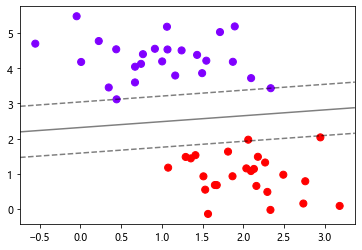

In [77]:
#将上述过程包装成函数：
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    y,x = np.meshgrid(y,x) 
    xy = np.vstack([x.ravel(), y.ravel()]).T
    P = model.decision_function(xy).reshape(x.shape)
    
    ax.contour(x, y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"]) 
    ax.set_xlim(xlim)
    ax.set_ylim(ylim) #则整个绘图过程可以写作：
clf = SVC(kernel = "linear").fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

In [81]:
clf.predict(x)
clf.score(x,y)
# 返回支持向量
clf.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

推广到非线性

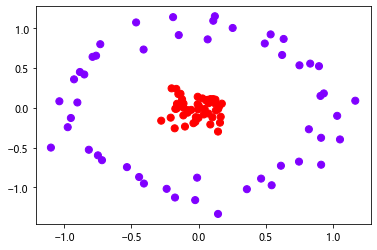

In [98]:
from sklearn.datasets import make_circles
#  环形数据
x,y = make_circles(100, factor=0.1, noise=.1,random_state=0) 
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")
plt.show()

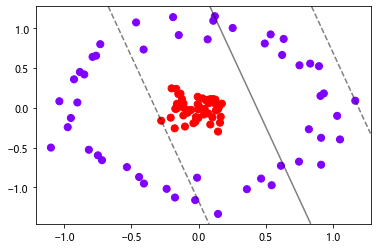

In [99]:
clf = SVC(kernel = "linear").fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

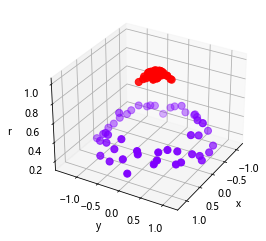

In [101]:
#定义一个由x计算出来的新维度r 
r = np.exp(-(x**2).sum(1))

rlim = np.linspace(min(r),max(r),100)
from mpl_toolkits import mplot3d

#定义一个绘制三维图像的函数
#elev表示上下旋转的角度
#azim表示平行旋转的角度
def plot_3D(elev=30,azim=30,X=x,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()
plot_3D()